In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets 
from sklearn.cluster import KMeans 
amazon = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/amazon_toy_sample_clean.csv", encoding="ISO-8859-1") 
amazon.dropna(inplace=True) 

In [ ]:
amazon2 = amazon[['price','number_available_in_stock','number_of_reviews','number_of_answered_questions','average_review_rating_of_5']]

In [ ]:
amazon2 = amazon2.set_index('average_review_rating_of_5')
amazon2

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions
average_review_rating_of_5,,,,
4.0,0.29,3,3,2
4.5,0.38,2,2,1
4.5,0.39,7,2,1
4.3,0.60,7,21,1
4.1,0.64,6,10,2
...,...,...,...,...
3.3,439.95,11,9,3
5.0,447.99,3,1,3
5.0,719.95,2,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
amazon2_array = sc.fit_transform(amazon2.values) #calculate μ & σ (fit) and apply the transformation(transform)
amazon2_array

array([[-0.43043632, -0.62884591, -0.20813825, -0.14346266],
       [-0.42849516, -0.73842478, -0.23363   , -0.21795561],
       [-0.42827947, -0.19053043, -0.23363   , -0.21795561],
       ...,
       [15.09154059, -0.73842478, -0.25912176, -0.21795561],
       [21.0263253 , -0.73842478, -0.18264649,  1.12291751],
       [52.18869012, -0.73842478, -0.25912176, -0.21795561]])

In [ ]:
amazon2_norm = pd.DataFrame(amazon2_array, index=amazon2.index, columns=amazon2.columns)
amazon2_norm

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions
average_review_rating_of_5,,,,
4.0,-0.430436,-0.628846,-0.208138,-0.143463
4.5,-0.428495,-0.738425,-0.233630,-0.217956
4.5,-0.428279,-0.190530,-0.233630,-0.217956
4.3,-0.423750,-0.190530,0.250713,-0.217956
4.1,-0.422887,-0.300109,-0.029696,-0.143463
...,...,...,...,...
3.3,9.052364,0.247785,-0.055188,-0.068970
5.0,9.225775,-0.628846,-0.259122,-0.068970
5.0,15.091541,-0.738425,-0.259122,-0.217956


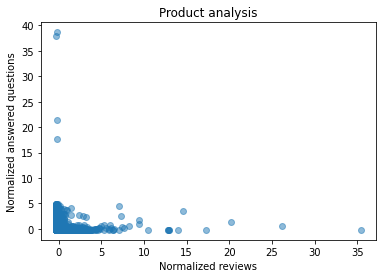

In [ ]:
plt.scatter(amazon2_norm['number_of_reviews'], amazon2_norm['number_of_answered_questions'], alpha=0.5)
plt.title('Product analysis')
plt.xlabel('Normalized reviews')
plt.ylabel('Normalized answered questions')
plt.show() 

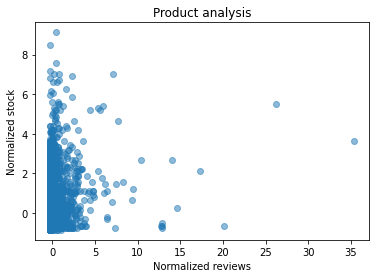

In [ ]:
plt.scatter(amazon2_norm['number_of_reviews'], amazon2_norm['number_available_in_stock'], alpha=0.5)
plt.title('Product analysis')
plt.xlabel('Normalized reviews')
plt.ylabel('Normalized stock')
plt.show() 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, ).fit(amazon2_norm)
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
groups = {0: [], 1: [], 2: []} # We have 3 clusters
i = 0                                       # Initializing the row counter
for index, row in amazon2.iterrows():      # We are now going through each row in dog_data
    groups[labels[i]].append(index)         # and appending the cluster labels/ numbers to each index
    i += 1

## Now we make a pretty list:

for key, value in groups.items():           # the key is the cluster number and the value is the names of the dogs
    print ('CLUSTER %i' % key)
    for average_review_rating_of_5 in value:
        print("    %s" % average_review_rating_of_5)
    print('\n')

Streaming output truncated to the last 5000 lines.
    4.2
    5.0
    4.5
    4.7
    5.0
    5.0
    4.6
    5.0
    5.0
    5.0
    5.0
    5.0
    5.0
    4.7
    5.0
    4.8
    4.4
    5.0
    5.0
    4.7
    4.0
    5.0
    4.0
    4.8
    5.0
    5.0
    5.0
    5.0
    4.7
    5.0
    4.0
    5.0
    5.0
    4.7
    4.5
    4.0
    4.2
    4.5
    5.0
    4.3
    4.4
    4.0
    5.0
    5.0
    5.0
    5.0
    4.0
    4.0
    5.0
    4.0
    5.0
    4.6
    4.0
    4.8
    4.0
    4.5
    4.0
    5.0
    5.0
    4.0
    5.0
    4.0
    4.5
    4.0
    5.0
    4.5
    4.8
    5.0
    5.0
    5.0
    5.0
    5.0
    5.0
    5.0
    5.0
    5.0
    5.0
    5.0
    4.6
    5.0
    5.0
    5.0
    5.0
    5.0
    5.0
    5.0
    5.0
    5.0
    4.4
    5.0
    5.0
    4.8
    4.5
    5.0
    4.6
    4.8
    5.0
    5.0
    5.0
    5.0
    5.0
    4.5
    4.0
    5.0
    4.2
    5.0
    4.9
    4.3
    4.6
    4.6
    4.3
    4.0
    4.8
    5.0
    4.2
    4.8
    5.0
    4.8
    5

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
k:  21
k:  22
k:  23
k:  24


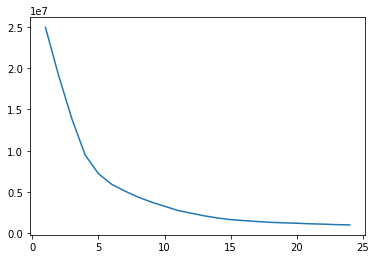

In [ ]:
def elbow_plot(data, maxK=25, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(amazon2[['price','number_available_in_stock','number_of_reviews','number_of_answered_questions']], maxK=25)

In [ ]:
kmeans_4 = KMeans(n_clusters=4)

In [ ]:
kmeans_amazon = kmeans_4.fit(amazon2_norm[['price','number_available_in_stock','number_of_reviews','number_of_answered_questions']])

In [ ]:
from sklearn.model_selection import train_test_split
X = amazon2_array
y = amazon2['number_of_reviews']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (4165, 4)
X_test shape: (2147, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



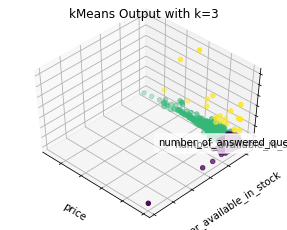

In [ ]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

X=amazon2_array
y=kmeans_amazon.labels_ # These are the cluster labels that kMeans has assigned

for name, label in [('price', 0),
                    ('number_available_in_stock', 1),
                    ('number_of_answered_questions', 2)]:
    ax.text3D(X[y == label, 1].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))


ax.scatter(amazon2.iloc[:, 1], amazon2.iloc[:, 0], amazon2.iloc[:, 2], c=y.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('price')
ax.set_ylabel('number_available_in_stock')
ax.set_zlabel('number_of_answered_questions')
ax.set_title('kMeans Output with k=3')
plt.show()

In [ ]:
amazon4 = amazon[['price','number_available_in_stock','number_of_reviews','number_of_answered_questions','average_review_rating_of_5']]
amazon4 = amazon4.set_index('average_review_rating_of_5')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clusterer = AgglomerativeClustering(affinity='euclidean', linkage='ward')
clusterer.fit(amazon2_norm)

AgglomerativeClustering()

In [ ]:
clusterer.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import itertools
ii = itertools.count(amazon2_norm.shape[0])
[{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in clusterer.children_]

[{'left': 206, 'node_id': 6312, 'right': 207},
 {'left': 344, 'node_id': 6313, 'right': 345},
 {'left': 346, 'node_id': 6314, 'right': 6313},
 {'left': 461, 'node_id': 6315, 'right': 466},
 {'left': 485, 'node_id': 6316, 'right': 486},
 {'left': 606, 'node_id': 6317, 'right': 611},
 {'left': 448, 'node_id': 6318, 'right': 453},
 {'left': 582, 'node_id': 6319, 'right': 583},
 {'left': 608, 'node_id': 6320, 'right': 610},
 {'left': 788, 'node_id': 6321, 'right': 790},
 {'left': 791, 'node_id': 6322, 'right': 6321},
 {'left': 793, 'node_id': 6323, 'right': 6322},
 {'left': 799, 'node_id': 6324, 'right': 6323},
 {'left': 924, 'node_id': 6325, 'right': 925},
 {'left': 1040, 'node_id': 6326, 'right': 1041},
 {'left': 1042, 'node_id': 6327, 'right': 6326},
 {'left': 1075, 'node_id': 6328, 'right': 1082},
 {'left': 1089, 'node_id': 6329, 'right': 6328},
 {'left': 1090, 'node_id': 6330, 'right': 6329},
 {'left': 1091, 'node_id': 6331, 'right': 6330},
 {'left': 1240, 'node_id': 6332, 'right': 12

In [ ]:
amazon_names = pd.DataFrame({'average_review_rating_of_5': amazon2_norm.index.values})


In [ ]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(amazon4, labels=amazon4.index)
fig.update_layout(width=800, height=500)
fig.show()

In [ ]:
from plotly.figure_factory import create_dendrogram
fig = create_dendrogram(dog_data, labels=dog_data.index)
fig.show()

In [ ]:
## import data
from sklearn.datasets import make_moons
from sklearn import datasets

## import DBSCAN model
from sklearn.cluster import DBSCAN
from sklearn import metrics

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
X_1 = amazon2_array

In [ ]:
X_1, labels_true = make_moons(n_samples=1000, noise=0.1, random_state=19)
print(X_1[:10,])

[[ 1.356582   -0.41128598]
 [ 1.16328685 -0.37585198]
 [ 0.89749586  0.16228088]
 [ 1.3725998  -0.4508466 ]
 [-1.14736068  0.14974386]
 [ 0.95053826 -0.62248379]
 [ 0.12872797  0.97343597]
 [ 2.04861934  0.26544361]
 [ 0.57663531 -0.57298032]
 [-1.00860968  0.23947793]]


In [ ]:
model_1 = DBSCAN(eps=0.25, min_samples=12).fit(X_1)
print(model_1) # model set-ups and parameters

DBSCAN(eps=0.25, min_samples=12)


In [ ]:
model_1.get_params

<bound method BaseEstimator.get_params of DBSCAN(eps=0.25, min_samples=12)>

In [ ]:
labels_1=model_1.labels_
labels_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
model_1.fit_predict(X_1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

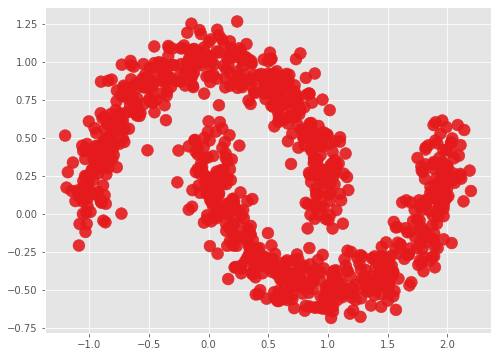

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_1[:, 0], X_1[:, 1], c=model_1.labels_, s=140, alpha=0.9, cmap=plt.cm.Set1)

fig.show()

In [ ]:
# Number of clusters in labels, ignoring noise points
n_clusters_ = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 1


In [ ]:
print("Number of Noise Points: ",sum(model_1.labels_==-1)," (",len(model_1.labels_),")",sep='')

Number of Noise Points: 0 (1000)


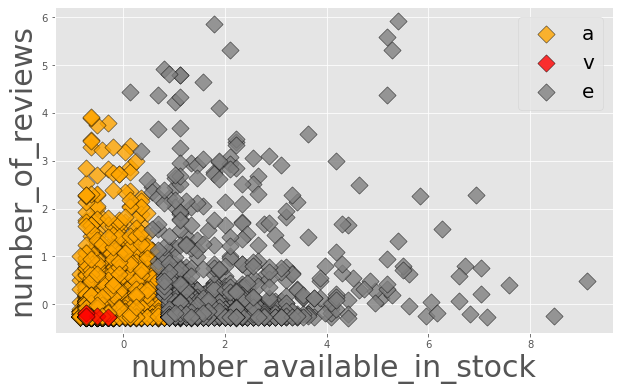

In [ ]:
plt.figure(2, figsize=(10, 6))
colors = ['orange', 'red', 'gray']


for color, i, amazon_names in zip(colors, [0, 1, 2], amazon_names):
    plt.scatter(X[y == i, 1], X[y == i, 2], color=color, alpha=.8, 
                label=amazon_names, s=150, cmap=plt.cm.Set1, edgecolor='k',marker='D')
plt.legend(loc='best', shadow=False, scatterpoints=1,fontsize=20)
plt.xlabel('number_available_in_stock', fontsize=30) 
plt.ylabel('number_of_reviews', fontsize=30) 
plt.show()

In [ ]:
model = DBSCAN(eps=0.8, min_samples=6).fit(X)
labels=model.labels_
labels

array([ 0,  0,  0, ..., -1, -1, -1])

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

1

In [ ]:
print("Completeness: %0.1f" %  metrics.completeness_score([0, 0, 1, 1], [1, 1, 0, 0]))

Completeness: 1.0


In [ ]:
print("Completeness: %0.1f" %  metrics.completeness_score([0, 0, 1, 1], [0, 0, 0, 0]))

Completeness: 1.0


In [ ]:
print("Homogeneity: %0.1f" %  metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))

Homogeneity: 0.0


In [ ]:
amazon_target = pd.DataFrame(amazon2, columns=['number of reviews'])

In [ ]:
model_2 = DBSCAN(eps=0.8, min_samples=6).fit(X)
labels=model_2.labels_
labels_true = amazon2.number_of_reviews

print("Completeness: %0.2f" % metrics.completeness_score(labels_true, labels))
print("Homogeneity: %0.2f" % metrics.homogeneity_score(labels_true, labels))

Completeness: 0.49
Homogeneity: 0.01
